Task to make a plot based on the following data:
1.CEC Forest biome map://www.cec.org/north-american-environmental-atlas/north-american-forests-2011/ 
2.Belmanip2:http://calvalportal.ceos.org/web/olive/site-description
3.Canada LAI
4.USA LAI
5.USA Canada boundary

In [1]:
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### read data
NA_Forest = gpd.read_file('d:\\vegetation\\gee\\NA_Forests\\NA_Forests_1to10mill.shp') # North American Forest
boundary = gpd.read_file('d:\\vegetation\\gee\\USA_Canada_Extent.shp') #USA and Canada Boundary
Canada_LAI= pd.read_csv('d:\\vegetation\\gee\\In-situLAI_Canada_2017_2019_location.csv') #Canda LAI
USA_LAI= pd.read_csv('d:\\vegetation\\gee\\GBOV_RM07_all_coordinate.csv')#USA LAI
Belmanip= pd.read_csv('d:\\vegetation\\gee\\OLIVE_DATASETS.csv') #Belmanip 2 data

In [3]:
###data preparation
NA_Forest=NA_Forest.to_crs(epsg=4326)
#vaidate geometry of polygons 
boundary['geometry'] = boundary.buffer(0)
#boundary[~boundary.is_valid]
NA_Forest['geometry']=NA_Forest.buffer(0)
#NA_Forest[~NA_Forest.is_valid]
NA_Forest_clipped=gpd.clip(NA_Forest,boundary)
# creating a geometry column 
CanadaLAI_geometry = [Point(xy) for xy in zip(Canada_LAI['LONG'], Canada_LAI['LAT'])]
USALAI_geometry = [Point(xy) for xy in zip(USA_LAI['Lon_IS'], USA_LAI['Lat_IS'])]
Belmanip_geometry = [Point(xy) for xy in zip(Belmanip['Lon_cent'], Belmanip['Lat_cent'])]
# Coordinate reference system : WGS84
#crs1 = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
CanadaLAI_gdf = gpd.GeoDataFrame(Canada_LAI, crs='epsg:4326', geometry=CanadaLAI_geometry)
USALAI_gdf = gpd.GeoDataFrame(USA_LAI, crs='epsg:4326', geometry=USALAI_geometry)
Belmanip_gdf = gpd.GeoDataFrame(Belmanip, crs='epsg:4326', geometry=Belmanip_geometry)
Belmanip_gdf_subset = gpd.clip(Belmanip_gdf, boundary)

C:\Users\gahong\.conda\envs\eeALR\lib\site-packages\ipykernel_launcher.py:8: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  
C:\Users\gahong\.conda\envs\eeALR\lib\site-packages\ipykernel_launcher.py:19: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269



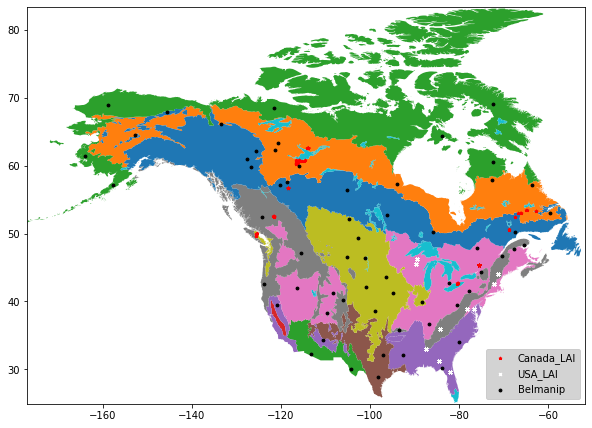

In [4]:
###plot data
fig, ax = plt.subplots(figsize = (10,200))

#xlim = ([NA_Forest.total_bounds[0],  NA_Forest.total_bounds[2]])
#ylim = ([NA_Forest.total_bounds[1],  NA_Forest.total_bounds[3]])
xlim = ([boundary.total_bounds[0],  boundary.total_bounds[2]])
ylim = ([boundary.total_bounds[1],  boundary.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

base=NA_Forest_clipped.plot(column='EZMAP_ZONE', ax=ax)                            
CanadaLAI_gdf.plot(ax=base, marker='*', color='red', markersize=8, label='Canada_LAI');
USALAI_gdf.plot(ax=base, marker='x', color='white', markersize=8, label='USA_LAI');
Belmanip_gdf_subset.plot(ax=base, marker='o', color='black', markersize=8,label='Belmanip');
leg=ax.legend(loc="lower right",facecolor='lightgrey', framealpha=1)